In [95]:
# ANÁLISIS NUMÉRICO
# TAREA EXAMEN V. INTERPOLACIÓN 

# ARTURO YITZACK REYNOSO SÁNCHEZ

# EJERCICIO 4
# En papel milim ́etrico escribir la primer letra de su nombre, en letra manuscrita
# y mayúscula, de forma continua para crear una curva, capturar los puntos
# necesarios en un lista, con los datos obtenidos construir el Spline Cúbico
# (completo) para reproducir la curva.

# En mi caso, vamos a graficar la letra A, en mayúscula y manuscrita, y consta
# de cuatro trazos o curvas. 


# Función auxiliar.
def triDiagluSol(d,e,f,b):
    ''' 
    Nos da la solución de un sistema tridiagonal
    Ax = b, con A una matriz tridiagonal.

    - Entrada >
      d (1D ndarray)  - Diagonal de la matriz.
      e (1D ndarray)  - Diagonal por debajo de la diagonal principal. 
      f (1D ndarray)  - Diagonal por arriba de la diagonal principal.
      b (1D ndarray)  - Vector lado derecho del sistema de ecuaciones lineales.
    - Salida 
      x (1D ndarray)  - Solución del sistema de ecuaciones lineales.
    '''
    n = d.size
    l = np.zeros((n-1,),dtype = "float64")
    u = np.array(d,copy = True,dtype = "float64")
    for j in range(1,n):
        l[j-1] = e[j-1]/u[j-1]
        u[j] = d[j] - l[j-1]*f[j-1]
    l = np.append(b[0],l)
    for j in range(1,n):
        l[j] = b[j] - l[j-1]*l[j]
    u[-1] = l[-1]/u[-1]
    for j in reversed(range(n-1)):
        u[j] = (l[j] - f[j]*u[j+1])/u[j]
    return u

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def splinecub_C(x,fx, fpo, fpn):
    """ Calcula los coeficientes a_{j}, b_{j}, c_{j} y d_{j} de los polinomios cubicos S_{j} de un
    spline cúbico completo.
    
    - Entrada >
      x (1D ndarray)  - Vector con los puntos que definen las abscisas x_{j}. 
                        Se supone que son distintos y estan ordenados.
      fx (1D ndarray) - Vector con los puntos que definen las ordenadas f(x_{j}). 
      fpo (float)     - La derivada en el punto x_0. Esta derivada es aproximada 
                        cuando no tenemos una función que describa la curva.
      fpn (float)     - La derivada en el punto x_n. Esta derivada es aproximada
                        cuando no tenemos una función que describa la curva.
    - Salida 
      a (1D ndarray) - Coeficientes a_{j} del polinomio cúbico S_{j} en el intervalo [x_{j},x_{j+1}].
      b (1D ndarray) - Coeficientes b_{j} del polinomio cúbico S_{j} en el intervalo [x_{j},x_{j+1}].
      c (1D ndarray) - Coeficientes c_{j} del polinomio cúbico S_{j} en el intervalo [x_{j},x_{j+1}].
      d (1D ndarray) - Coeficientes d_{j} del polinomio cúbico S_{j} en el intervalo [x_{j},x_{j+1}].
    """
    # Se asigna a_{j} y se calcula h_{j}
    a = fx
    h = x[1:] - x[:-1]
    
    # Se construye A y el lado derecho y. Se resuelve el sistema Ac = y
    dp,rhs = np.ones((x.size,)),np.zeros((x.size,))
    dp[1:-1] = 2.0*(h[:-1] + h[1:])
    dp[0] = 2*h[0]
    dp[-1] = 2*h[-1]
    rhs[1:-1] = 3.0*(a[2:]-a[1:-1])/h[1:] - 3*(a[1:-1]-a[:-2])/h[:-1] 
    rhs[0] = 3.0*(a[1]-a[0])/h[0]-3*fpo  
    rhs[-1] = 3.0*fpn - 3*(a[-1] - a[-2])/h[-1]
    c = triDiagluSol(dp,h,h,rhs)
    
    # Se calcula b_{j} y d_{j}
    b = (a[1:]-a[:-1])/h - h*(2.0*c[:-1] + c[1:])/3.0
    d = (c[1:] - c[:-1])/(3.0*h)
    return a,b,c,d


# Creamos los arreglos de puntos de los 4 trazos que vamos a graficar:
# Curva 1: xo (coordenas X) y fx0 (cordenadas Y).
# Curva 2: x1 y fx1.
# Curva 3: x2 y fx2.
# Curva 4: x3 y fx3.

x0 = np.array([13,16,21,26,34,48,56,65,74,77,83,92,97,100,104])
fx0 = np.array([33,29,29,31,36,50,60,77,98,107,124,150,170,180,197])
x1 = np.array([104,109,112,115,122,128,132,136,147])
fx1 = np.array([197,170,150,131,100,80,72,60,40])
x2 = np.array([47,50,57,65,80,100,113,124,132,145,157])
fx2 = np.array([100,90,83,77,74,72,71,72,72,74,79])
x3 = np.array([47,50,60,77,91,101,114,124,135,147])
fx3 = np.array([100,106,110,107,101,94,83,72,55,40])


# Creamos una lista x, la entrada i contiene las coordenadas X de la curva i.
x = []
x.extend([x0,x1,x2,x3])

# Creamos una lista fx, la entrada i contiene las coordenadas Y de la curva i.
fx = []
fx.extend([fx0,fx1,fx2,fx3])

# Creamos una lista coef, que contiene los coeficientes de los polinomios
# de cada trazo obtenidos por medio del Spline cúbico completo.
coef = []
coef.append(splinecub_C(x[0],fx[0],fpo = -1, fpn = 2))
coef.append(splinecub_C(x[1],fx[1],fpo = -3, fpn = -2))
coef.append(splinecub_C(x[2],fx[2],fpo = -9, fpn = 0.5))
coef.append(splinecub_C(x[3],fx[3],fpo = 9, fpn = -2))
def plotSC_C(x,fx,coef,fun = None):
    """ Hace la gráfica del spline cúbico completo de una curva o varias curvas.
    
    - Entrada >
      x (lista de     - Lista de Vectores . Cada entrada es un vector con los 
                        puntos que definen las abscisas X_{j} de una curva.
         1D array)      Se supone que son distintos y estan 
                        ordenados.
      fx (lista de    - Lista de vectores. Cada entrada es un vector con los 
                        puntos que definen las ordenadas f(x_{j}) de una curva.
          1D array)
      coef (lista     - Es una lista donde cada entrada es una tupla de tamaño 4
          de tuplas)    y cada una de sus entradas corresponden
                        a los coeficientes a_{j}, b_{j}, c_{j}, d_{j} del spline
                         cúbico completo S.
                        Vease la función splinecub_C para más detalles.
    """
    if fun is not None:
        p = np.linspace(x[0],x[-1])
        plt.plot(p,fun(p),'--',color = 'steelblue',label = 'Funcion',lw=2)

    for j in range(0, len(x)):
      for i in range(x[j].size-1):
          p = np.linspace(x[j][i],x[j][i+1])
          Sp = coef[j][0][i] + coef[j][1][i]*(p-x[j][i]) \
              + coef[j][2][i]*(p-x[j][i])**2 + coef[j][3][i]*(p-x[j][i])**3
          if i == 0 and j == 0:
            plt.plot(p,Sp,color='firebrick',lw=2,label = 'Trazo 1')
          elif i > 0 and j == 0:
            plt.plot(p,Sp,color='firebrick',lw=2)
          elif i == 0 and j == 1:
            plt.plot(p,Sp,color='blue',lw=2, label = 'Trazo 2')
          elif i > 0 and j == 1:
            plt.plot(p,Sp,color='blue',lw=2)
          elif i == 0 and j == 2:
            plt.plot(p,Sp,color='yellow',lw=2, label = 'Trazo 3')
          elif i > 0 and j == 2:
            plt.plot(p,Sp,color='yellow',lw=2)
          elif i == 0 and j == 3:
            plt.plot(p,Sp,color='purple',lw=2, label = 'Trazo 4')
          else:
            plt.plot(p,Sp,color='purple',lw=2)
      if j == len(x) - 1:
        plt.scatter(x[j],fx[j], marker = 'o', facecolors = "none", color = 'olivedrab', label = 'Datos')
      else:
        plt.scatter(x[j],fx[j], marker = 'o', facecolors = "none", color = 'olivedrab')
    plt.gca().set_aspect('equal', adjustable = None)
    plt.gca().legend()
    plt.show()

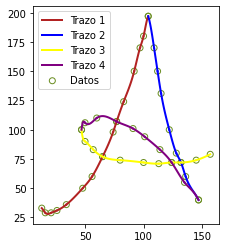

In [96]:
plotSC_C(x,fx,coef)